<a href="https://www.kaggle.com/code/mesutssmn/book-price-prediction?scriptVersionId=157892477" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("/kaggle/input/books-sold-dataset/Kaggle_Books-Selling-Records-.csv")

In [3]:
df.head()

,ID,Purchase-date,Date,Time,Quarter,Qtr,Year,Month,Date.1,Special Day,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
0,1,2018-01-01T08:57:53+00:00,1/1/2018,8:57 AM,2018 - Q1,1,2018,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2018-01-02T02:04:01+00:00,1/2/2018,2:04 AM,2018 - Q1,1,2018,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2018-01-03T05:08:38+00:00,1/3/2018,5:08 AM,2018 - Q1,1,2018,1,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2018-01-04T16:06:31+00:00,1/4/2018,4:06 PM,2018 - Q1,1,2018,1,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2018-01-04T20:12:20+00:00,1/4/2018,8:12 PM,2018 - Q1,1,2018,1,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,ID,Purchase-date,Date,Time,Quarter,Qtr,Year,Month,Date.1,Special Day,Online Sale Offers,Day,Weekend,Morning,Afternoon,Evening,Night,Gender,Customer ID,Gender\nF=1665\nM=1815,Product-Name,Item-Status,Quantity,Currency,Item Price,Shipping-Price,Ship-City,Ship-State,Ship-Postal-Code,Category,Total_\namount,Author,Publication,Profit Percentage\n (%),Profit (INR),Cost Price,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
0,1,2018-01-01T08:57:53+00:00,1/1/2018,8:57 AM,2018 - Q1,1,2018,1,1,1,1,1,0,1,0,0,0,1,B07FWXWZT,F,Database System Concepts (Int'l Ed),Shipped,1,INR,999.0,85.0,Hyderabad,Telangana,500073,college,1084.0,Avi Silberschatz,McGraw-Hill,13,129.87,869.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2018-01-02T02:04:01+00:00,1/2/2018,2:04 AM,2018 - Q1,1,2018,1,2,1,1,2,0,0,0,0,1,0,B07FWVXXU,M,ESE 2020 Mains Examination: Electrical Enginee...,Shipped,1,INR,640.0,85.0,DHARMAPURI,TAMIL NADU,636701,competition,725.0,Team of Engineers Academy,Engineers Academy Publication,17,108.80,531.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2018-01-03T05:08:38+00:00,1/3/2018,5:08 AM,2018 - Q1,1,2018,1,3,1,1,3,0,0,0,0,1,0,B07FWVXZS,M,Objective Type Pharmacy,Shipped,1,INR,715.0,85.0,GUWAHATI,ASSAM,781024,competition,800.0,Dr. mohammed Ali,BHUTERAENTERPRISES,17,121.55,593.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2018-01-04T16:06:31+00:00,1/4/2018,4:06 PM,2018 - Q1,1,2018,1,4,0,1,4,0,0,0,1,0,1,B07FWYXVQ,F,A Text Book of Optics,Shipped,1,INR,565.0,85.0,Palani,TAMIL NADU,624601,college,650.0,N Subrahmanyam,S. Chand Publishing,13,73.45,491.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2018-01-04T20:12:20+00:00,1/4/2018,8:12 PM,2018 - Q1,1,2018,1,4,0,0,4,0,0,0,0,1,1,B07FWXATQ,F,Surveying - Vol. 2,Shipped,1,INR,494.0,85.0,PATNA,BIHAR,800013,college,579.0,Duggal,McGraw Hill Education,13,64.22,429.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['ID', 'Purchase-date', 'Date', 'Time', 'Quarter', 'Qtr', 'Year',
       'Month', 'Date.1', 'Special Day', 'Online Sale Offers ', 'Day',
       'Weekend', 'Morning', 'Afternoon', 'Evening', 'Night', 'Gender',
       'Customer ID', 'Gender\nF=1665\nM=1815', 'Product-Name', 'Item-Status',
       'Quantity', 'Currency', 'Item Price', 'Shipping-Price', 'Ship-City',
       'Ship-State', 'Ship-Postal-Code', 'Category', 'Total_\namount',
       'Author ', 'Publication', 'Profit Percentage\n (%)', 'Profit (INR)',
       'Cost Price', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46',
       'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50',
       'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54',
       'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58',
       'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62',
       'Unnamed

In [7]:
df.drop(['Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46',
       'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50',
       'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54',
       'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58',
       'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62',
       'Unnamed: 63', 'Unnamed: 64', 'Unnamed: 65', 'Unnamed: 66',
       'Unnamed: 67'], axis = 1, inplace = True)

In [8]:
df_new = df.drop(["Gender\nF=1665\nM=1815", "Item-Status", "Customer ID",'Purchase-date',
         "Product-Name",'Date', 'Time', 'Quarter','Month', 'Date.1',
         'Special Day','Day', 'Morning', 'Afternoon', 'Evening', 'Night', 'Product-Name','Currency','Ship-City',
         'Ship-State', 'Ship-Postal-Code', 'Publication', 'Author ','Online Sale Offers '], axis = 1)

In [9]:
df.head(3)

,ID,Purchase-date,Date,Time,Quarter,Qtr,Year,Month,Date.1,Special Day,Online Sale Offers,Day,Weekend,Morning,Afternoon,Evening,Night,Gender,Customer ID,Gender\nF=1665\nM=1815,Product-Name,Item-Status,Quantity,Currency,Item Price,Shipping-Price,Ship-City,Ship-State,Ship-Postal-Code,Category,Total_\namount,Author,Publication,Profit Percentage\n (%),Profit (INR),Cost Price
0,1,2018-01-01T08:57:53+00:00,1/1/2018,8:57 AM,2018 - Q1,1,2018,1,1,1,1,1,0,1,0,0,0,1,B07FWXWZT,F,Database System Concepts (Int'l Ed),Shipped,1,INR,999.0,85.0,Hyderabad,Telangana,500073,college,1084.0,Avi Silberschatz,McGraw-Hill,13,129.87,869.13
1,2,2018-01-02T02:04:01+00:00,1/2/2018,2:04 AM,2018 - Q1,1,2018,1,2,1,1,2,0,0,0,0,1,0,B07FWVXXU,M,ESE 2020 Mains Examination: Electrical Enginee...,Shipped,1,INR,640.0,85.0,DHARMAPURI,TAMIL NADU,636701,competition,725.0,Team of Engineers Academy,Engineers Academy Publication,17,108.80,531.20
2,3,2018-01-03T05:08:38+00:00,1/3/2018,5:08 AM,2018 - Q1,1,2018,1,3,1,1,3,0,0,0,0,1,0,B07FWVXZS,M,Objective Type Pharmacy,Shipped,1,INR,715.0,85.0,GUWAHATI,ASSAM,781024,competition,800.0,Dr. mohammed Ali,BHUTERAENTERPRISES,17,121.55,593.45


In [10]:
df_new["Category"].unique()

array(['college', 'competition ', 'School', 'school'], dtype=object)

In [11]:
df_new["Category"] = df_new["Category"].map({'college':0, 'competition ':1, 'School':2, 'school':2})
df_new["Category"].unique()

array([0, 1, 2])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3480 non-null   int64  
 1   Purchase-date           3480 non-null   object 
 2   Date                    3480 non-null   object 
 3   Time                    3480 non-null   object 
 4   Quarter                 3480 non-null   object 
 5   Qtr                     3480 non-null   int64  
 6   Year                    3480 non-null   int64  
 7   Month                   3480 non-null   int64  
 8   Date.1                  3480 non-null   int64  
 9   Special Day             3480 non-null   int64  
 10  Online Sale Offers      3480 non-null   int64  
 11  Day                     3480 non-null   int64  
 12  Weekend                 3480 non-null   int64  
 13  Morning                 3480 non-null   int64  
 14  Afternoon               3480 non-null   

In [13]:
df.shape

(3480, 36)

In [14]:
df.describe()

,ID,Qtr,Year,Month,Date.1,Special Day,Online Sale Offers,Day,Weekend,Morning,Afternoon,Evening,Night,Gender,Quantity,Item Price,Shipping-Price,Ship-Postal-Code,Total_\namount,Profit Percentage\n (%),Profit (INR),Cost Price
count,3480.000000,3480.000000,3480.000000,3480.000000,3480.000000,3480.000000,3480.000000,3480.000000,3480.000000,3480.000000,3480.000000,3480.000000,3480.000000,3480.000000,3480.000000,3480.000000,3480.000000,3480.000000,3480.000000,3480.000000,3480.000000,3480.000000
mean,1740.500000,2.354598,2018.656322,5.948563,14.813506,0.104023,0.136207,4.003736,0.098851,0.318103,0.279023,0.175575,0.226724,0.478448,1.050287,377.747641,79.029230,420589.916379,456.776871,16.661207,59.810108,317.937532
std,1004.733796,0.883307,0.475003,2.697224,8.874455,0.305334,0.343057,1.997048,0.298504,0.465807,0.448583,0.380513,0.418773,0.499607,0.352464,327.258570,27.332728,204002.505467,338.977701,1.980181,47.708602,280.863478
min,1.000000,1.000000,2018.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,40.000000,0.000000,110001.000000,80.000000,13.000000,5.200000,34.800000
25%,870.750000,2.000000,2018.000000,4.000000,7.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,155.000000,67.000000,248007.000000,231.450000,17.000000,27.900000,127.100000
50%,1740.500000,2.000000,2019.000000,6.000000,14.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,285.000000,79.000000,401501.000000,340.000000,18.000000,45.000000,233.700000
75%,2610.250000,3.000000,2019.000000,8.000000,22.000000,0.000000,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,550.000000,89.000000,560087.000000,639.000000,18.000000,77.350000,472.410000
max,3480.000000,4.000000,2019.000000,12.000000,31.000000,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,6450.000000,850.000000,855107.000000,7300.000000,18.000000,838.500000,5611.500000


In [15]:
df['Item-Status'].unique()

array(['Shipped'], dtype=object)

In [16]:
df['Quantity'].unique()

array([ 1,  2,  5, 10,  3,  4,  9,  7])

In [17]:
df['Category'].unique()

array(['college', 'competition ', 'School', 'school'], dtype=object)

In [18]:
df.columns

Index(['ID', 'Purchase-date', 'Date', 'Time', 'Quarter', 'Qtr', 'Year',
       'Month', 'Date.1', 'Special Day', 'Online Sale Offers ', 'Day',
       'Weekend', 'Morning', 'Afternoon', 'Evening', 'Night', 'Gender',
       'Customer ID', 'Gender\nF=1665\nM=1815', 'Product-Name', 'Item-Status',
       'Quantity', 'Currency', 'Item Price', 'Shipping-Price', 'Ship-City',
       'Ship-State', 'Ship-Postal-Code', 'Category', 'Total_\namount',
       'Author ', 'Publication', 'Profit Percentage\n (%)', 'Profit (INR)',
       'Cost Price'],
      dtype='object')

In [19]:
df['Online Sale Offers '].unique()

array([1, 0])

In [20]:
df['Author '].value_counts()

Author 
NCERT                                       1602
MAHAVEER JAIN,ANSHUL JAIN KANTI JAIN         246
preeti agarwal, r.s. sharma, vinod gupta      72
Kanti Jain                                    72
Multiple Authors                              68
                                            ... 
GKP                                            1
 A.K. Jain                                     1
Narasimha Karumanchi                           1
vikas purohit                                  1
John David Jackson                             1
Name: count, Length: 183, dtype: int64

In [21]:
df.isnull().sum()

ID                         0
Purchase-date              0
Date                       0
Time                       0
Quarter                    0
Qtr                        0
Year                       0
Month                      0
Date.1                     0
Special Day                0
Online Sale Offers         0
Day                        0
Weekend                    0
Morning                    0
Afternoon                  0
Evening                    0
Night                      0
Gender                     0
Customer ID                0
Gender\nF=1665\nM=1815     0
Product-Name               0
Item-Status                0
Quantity                   0
Currency                   0
Item Price                 0
Shipping-Price             0
Ship-City                  0
Ship-State                 0
Ship-Postal-Code           0
Category                   0
Total_\namount             0
Author                     0
Publication                0
Profit Percentage\n (%)    0
Profit (INR)  

In [22]:
df_new.corr()

,ID,Qtr,Year,Weekend,Gender,Quantity,Item Price,Shipping-Price,Category,Total_\namount,Profit Percentage\n (%),Profit (INR),Cost Price
ID,1.000000,0.753132,0.822612,-0.365137,-0.014020,0.016019,-0.225394,-0.101269,0.398288,-0.225768,0.267215,-0.214846,-0.226132
Qtr,0.753132,1.000000,0.364527,-0.149329,-0.047811,0.017491,-0.096272,-0.034804,0.160344,-0.095750,0.095983,-0.086219,-0.097529
Year,0.822612,0.364527,1.000000,-0.449584,0.005116,0.015698,-0.370714,-0.066413,0.578666,-0.363253,0.416464,-0.358292,-0.371091
Weekend,-0.365137,-0.149329,-0.449584,1.000000,-0.001130,0.015576,0.157760,0.037553,-0.259702,0.155334,-0.171393,0.155390,0.157425
Gender,-0.014020,-0.047811,0.005116,-0.001130,1.000000,-0.002821,-0.009895,-0.007822,-0.005127,-0.010184,-0.009852,-0.013144,-0.009297
Quantity,0.016019,0.017491,0.015698,0.015576,-0.002821,1.000000,0.352997,0.365289,0.037794,0.370248,0.023182,0.378189,0.347067
Item Price,-0.225394,-0.096272,-0.370714,0.157760,-0.009895,0.352997,1.000000,0.394675,-0.547640,0.997252,-0.482709,0.976427,0.999328
Shipping-Price,-0.101269,-0.034804,-0.066413,0.037553,-0.007822,0.365289,0.394675,1.000000,-0.159943,0.461663,-0.172453,0.367869,0.397383
Category,0.398288,0.160344,0.578666,-0.259702,-0.005127,0.037794,-0.547640,-0.159943,1.000000,-0.541604,0.948172,-0.429297,-0.565181
Total_\namount,-0.225768,-0.095750,-0.363253,0.155334,-0.010184,0.370248,0.997252,0.461663,-0.541604,1.000000,-0.479926,0.972332,0.996821


<Axes: >

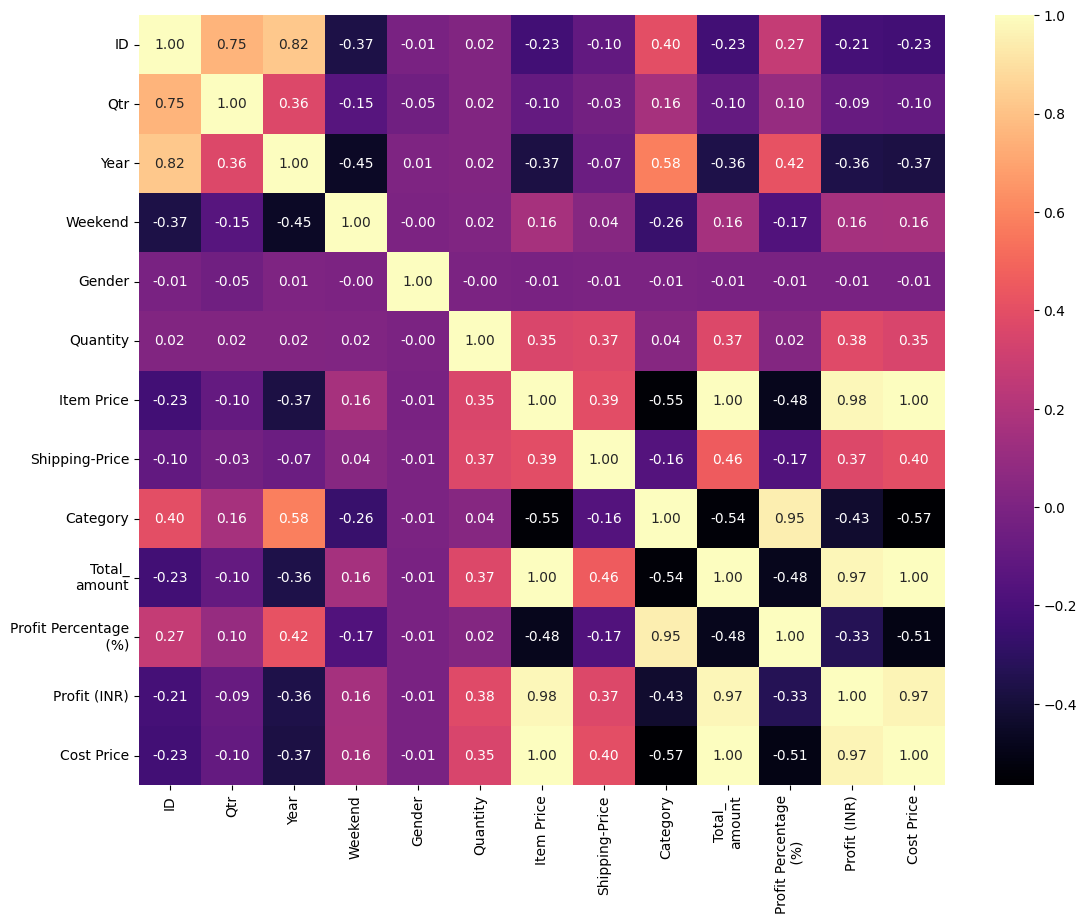

In [23]:
plt.figure(figsize=(13,10))
sns.heatmap(df_new.corr(), annot=True, fmt='.2f', cmap="magma")

In [24]:
df.head()

,ID,Purchase-date,Date,Time,Quarter,Qtr,Year,Month,Date.1,Special Day,Online Sale Offers,Day,Weekend,Morning,Afternoon,Evening,Night,Gender,Customer ID,Gender\nF=1665\nM=1815,Product-Name,Item-Status,Quantity,Currency,Item Price,Shipping-Price,Ship-City,Ship-State,Ship-Postal-Code,Category,Total_\namount,Author,Publication,Profit Percentage\n (%),Profit (INR),Cost Price
0,1,2018-01-01T08:57:53+00:00,1/1/2018,8:57 AM,2018 - Q1,1,2018,1,1,1,1,1,0,1,0,0,0,1,B07FWXWZT,F,Database System Concepts (Int'l Ed),Shipped,1,INR,999.0,85.0,Hyderabad,Telangana,500073,college,1084.0,Avi Silberschatz,McGraw-Hill,13,129.87,869.13
1,2,2018-01-02T02:04:01+00:00,1/2/2018,2:04 AM,2018 - Q1,1,2018,1,2,1,1,2,0,0,0,0,1,0,B07FWVXXU,M,ESE 2020 Mains Examination: Electrical Enginee...,Shipped,1,INR,640.0,85.0,DHARMAPURI,TAMIL NADU,636701,competition,725.0,Team of Engineers Academy,Engineers Academy Publication,17,108.80,531.20
2,3,2018-01-03T05:08:38+00:00,1/3/2018,5:08 AM,2018 - Q1,1,2018,1,3,1,1,3,0,0,0,0,1,0,B07FWVXZS,M,Objective Type Pharmacy,Shipped,1,INR,715.0,85.0,GUWAHATI,ASSAM,781024,competition,800.0,Dr. mohammed Ali,BHUTERAENTERPRISES,17,121.55,593.45
3,4,2018-01-04T16:06:31+00:00,1/4/2018,4:06 PM,2018 - Q1,1,2018,1,4,0,1,4,0,0,0,1,0,1,B07FWYXVQ,F,A Text Book of Optics,Shipped,1,INR,565.0,85.0,Palani,TAMIL NADU,624601,college,650.0,N Subrahmanyam,S. Chand Publishing,13,73.45,491.55
4,5,2018-01-04T20:12:20+00:00,1/4/2018,8:12 PM,2018 - Q1,1,2018,1,4,0,0,4,0,0,0,0,1,1,B07FWXATQ,F,Surveying - Vol. 2,Shipped,1,INR,494.0,85.0,PATNA,BIHAR,800013,college,579.0,Duggal,McGraw Hill Education,13,64.22,429.78


In [25]:
df['Purchase-date'] = df['Purchase-date'].str[0:10]

In [26]:
df["Purchase-date"] = pd.to_datetime(df["Purchase-date"], format = "%Y-%m-%d")

In [27]:
df.head()

,ID,Purchase-date,Date,Time,Quarter,Qtr,Year,Month,Date.1,Special Day,Online Sale Offers,Day,Weekend,Morning,Afternoon,Evening,Night,Gender,Customer ID,Gender\nF=1665\nM=1815,Product-Name,Item-Status,Quantity,Currency,Item Price,Shipping-Price,Ship-City,Ship-State,Ship-Postal-Code,Category,Total_\namount,Author,Publication,Profit Percentage\n (%),Profit (INR),Cost Price
0,1,2018-01-01,1/1/2018,8:57 AM,2018 - Q1,1,2018,1,1,1,1,1,0,1,0,0,0,1,B07FWXWZT,F,Database System Concepts (Int'l Ed),Shipped,1,INR,999.0,85.0,Hyderabad,Telangana,500073,college,1084.0,Avi Silberschatz,McGraw-Hill,13,129.87,869.13
1,2,2018-01-02,1/2/2018,2:04 AM,2018 - Q1,1,2018,1,2,1,1,2,0,0,0,0,1,0,B07FWVXXU,M,ESE 2020 Mains Examination: Electrical Enginee...,Shipped,1,INR,640.0,85.0,DHARMAPURI,TAMIL NADU,636701,competition,725.0,Team of Engineers Academy,Engineers Academy Publication,17,108.80,531.20
2,3,2018-01-03,1/3/2018,5:08 AM,2018 - Q1,1,2018,1,3,1,1,3,0,0,0,0,1,0,B07FWVXZS,M,Objective Type Pharmacy,Shipped,1,INR,715.0,85.0,GUWAHATI,ASSAM,781024,competition,800.0,Dr. mohammed Ali,BHUTERAENTERPRISES,17,121.55,593.45
3,4,2018-01-04,1/4/2018,4:06 PM,2018 - Q1,1,2018,1,4,0,1,4,0,0,0,1,0,1,B07FWYXVQ,F,A Text Book of Optics,Shipped,1,INR,565.0,85.0,Palani,TAMIL NADU,624601,college,650.0,N Subrahmanyam,S. Chand Publishing,13,73.45,491.55
4,5,2018-01-04,1/4/2018,8:12 PM,2018 - Q1,1,2018,1,4,0,0,4,0,0,0,0,1,1,B07FWXATQ,F,Surveying - Vol. 2,Shipped,1,INR,494.0,85.0,PATNA,BIHAR,800013,college,579.0,Duggal,McGraw Hill Education,13,64.22,429.78


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      3480 non-null   int64         
 1   Purchase-date           3480 non-null   datetime64[ns]
 2   Date                    3480 non-null   object        
 3   Time                    3480 non-null   object        
 4   Quarter                 3480 non-null   object        
 5   Qtr                     3480 non-null   int64         
 6   Year                    3480 non-null   int64         
 7   Month                   3480 non-null   int64         
 8   Date.1                  3480 non-null   int64         
 9   Special Day             3480 non-null   int64         
 10  Online Sale Offers      3480 non-null   int64         
 11  Day                     3480 non-null   int64         
 12  Weekend                 3480 non-null   int64   

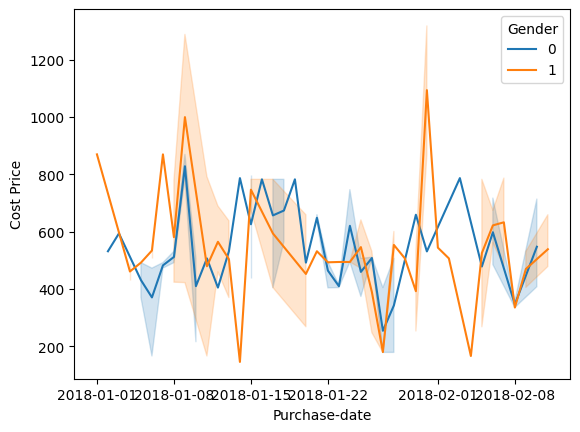

In [29]:
sns.lineplot(data = df.head(160), x = "Purchase-date", y = "Cost Price", color = "green", hue = "Gender")
plt.show()

<Axes: xlabel='Purchase-date', ylabel='Item Price'>

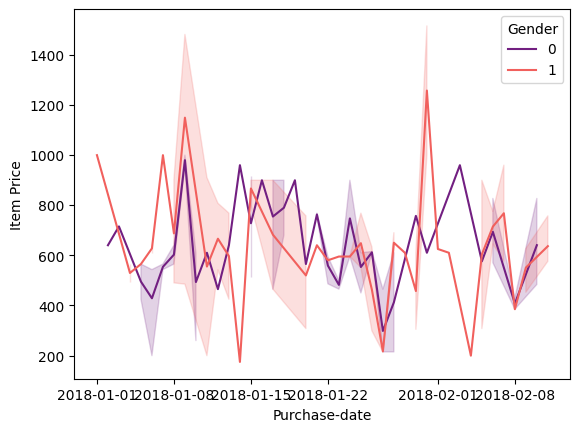

In [30]:
sns.lineplot(data = df.head(160), x = "Purchase-date", y = "Item Price",hue = "Gender",
             palette = "magma")

<Axes: xlabel='Purchase-date', ylabel='Item Price'>

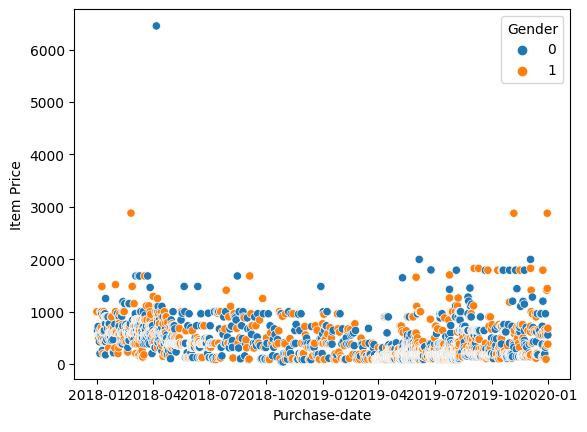

In [31]:
sns.scatterplot(df,  x = "Purchase-date", y = "Item Price",hue = "Gender")

<Axes: xlabel='Category', ylabel='Profit (INR)'>

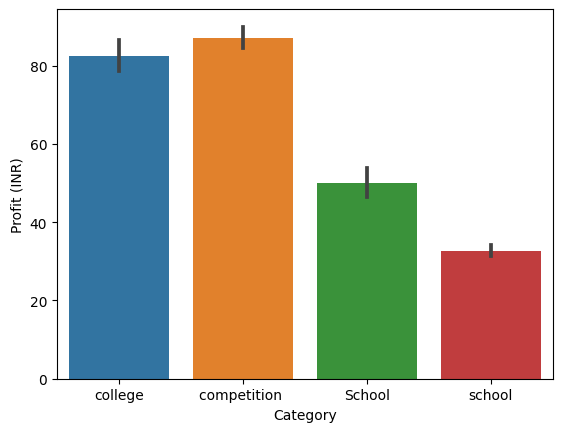

In [32]:
sns.barplot(df, x = "Category", y = "Profit (INR)")

In [33]:
df["Category"].value_counts()

Category
school          1277
competition      854
college          761
School           588
Name: count, dtype: int64

<Axes: xlabel='Profit (INR)', ylabel='Count'>

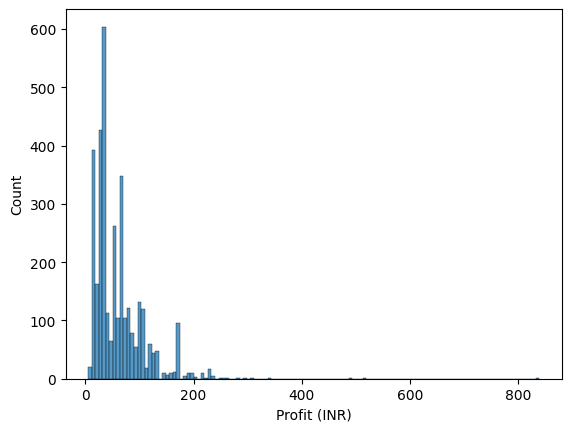

In [34]:
sns.histplot(df["Profit (INR)"])

<Axes: xlabel='Cost Price', ylabel='Count'>

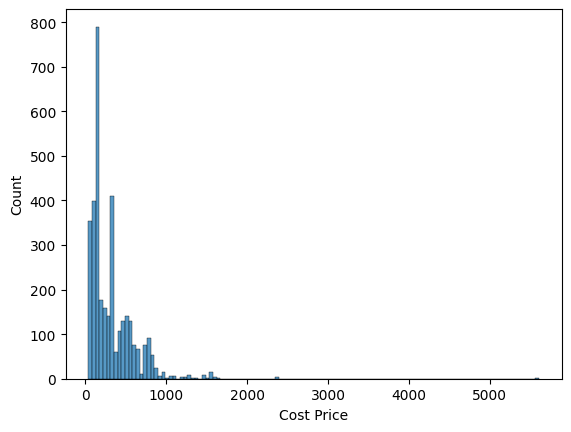

In [35]:
sns.histplot(df["Cost Price"])

In [36]:
df.groupby(by = ['Category']).count()

,ID,Purchase-date,Date,Time,Quarter,Qtr,Year,Month,Date.1,Special Day,Online Sale Offers,Day,Weekend,Morning,Afternoon,Evening,Night,Gender,Customer ID,Gender\nF=1665\nM=1815,Product-Name,Item-Status,Quantity,Currency,Item Price,Shipping-Price,Ship-City,Ship-State,Ship-Postal-Code,Total_\namount,Author,Publication,Profit Percentage\n (%),Profit (INR),Cost Price
Category,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
School,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588
college,761,761,761,761,761,761,761,761,761,761,761,761,761,761,761,761,761,761,761,761,761,761,761,761,761,761,761,761,761,761,761,761,761,761,761
competition,854,854,854,854,854,854,854,854,854,854,854,854,854,854,854,854,854,854,854,854,854,854,854,854,854,854,854,854,854,854,854,854,854,854,854
school,1277,1277,1277,1277,1277,1277,1277,1277,1277,1277,1277,1277,1277,1277,1277,1277,1277,1277,1277,1277,1277,1277,1277,1277,1277,1277,1277,1277,1277,1277,1277,1277,1277,1277,1277


<Axes: xlabel='Category', ylabel='count'>

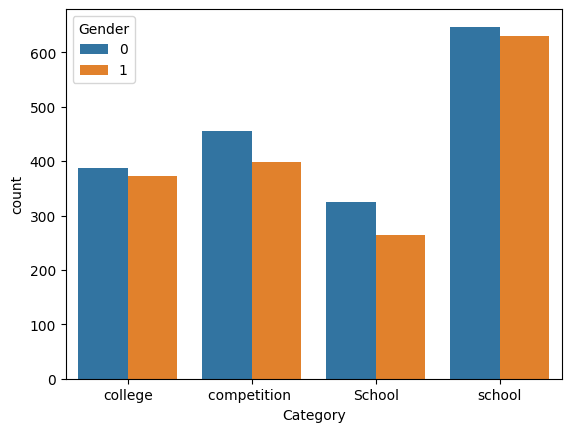

In [37]:
sns.countplot(df, x = 'Category', hue = "Gender")

<Axes: xlabel='Category', ylabel='Cost Price'>

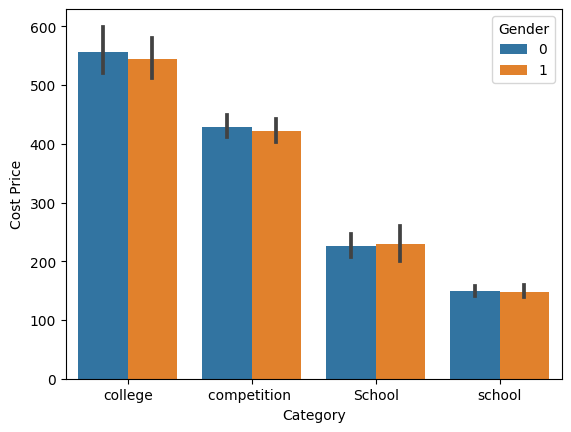

In [38]:
sns.barplot(df, x='Category', y='Cost Price', hue='Gender')

<Axes: xlabel='Category', ylabel='Gender'>

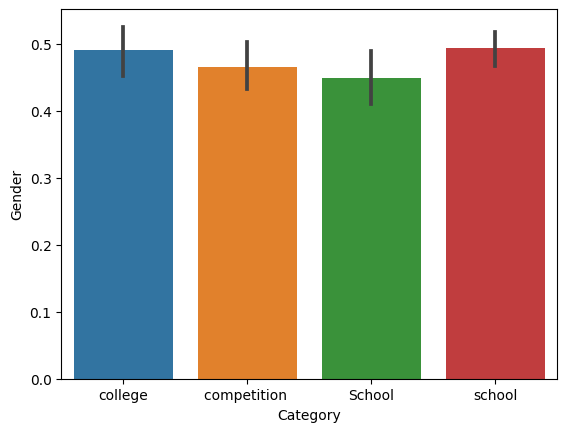

In [39]:
sns.barplot(df, x='Category', y='Gender')

In [40]:
df.columns

Index(['ID', 'Purchase-date', 'Date', 'Time', 'Quarter', 'Qtr', 'Year',
       'Month', 'Date.1', 'Special Day', 'Online Sale Offers ', 'Day',
       'Weekend', 'Morning', 'Afternoon', 'Evening', 'Night', 'Gender',
       'Customer ID', 'Gender\nF=1665\nM=1815', 'Product-Name', 'Item-Status',
       'Quantity', 'Currency', 'Item Price', 'Shipping-Price', 'Ship-City',
       'Ship-State', 'Ship-Postal-Code', 'Category', 'Total_\namount',
       'Author ', 'Publication', 'Profit Percentage\n (%)', 'Profit (INR)',
       'Cost Price'],
      dtype='object')

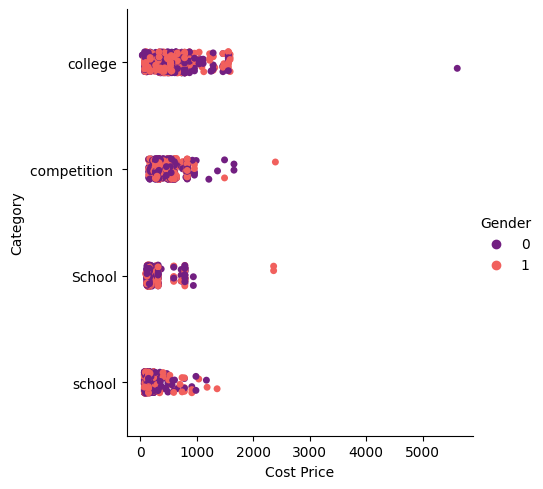

In [41]:
sns.catplot(df, y = "Category", x = "Cost Price", hue = "Gender", palette = "magma")

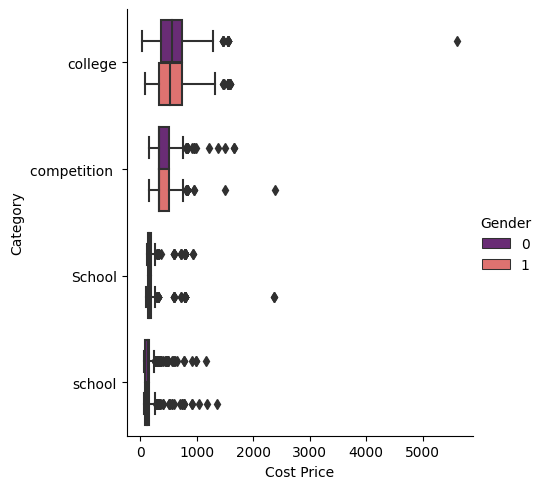

In [42]:
sns.catplot(df, y = "Category", x = "Cost Price", hue = "Gender", palette = "magma", kind = "box")

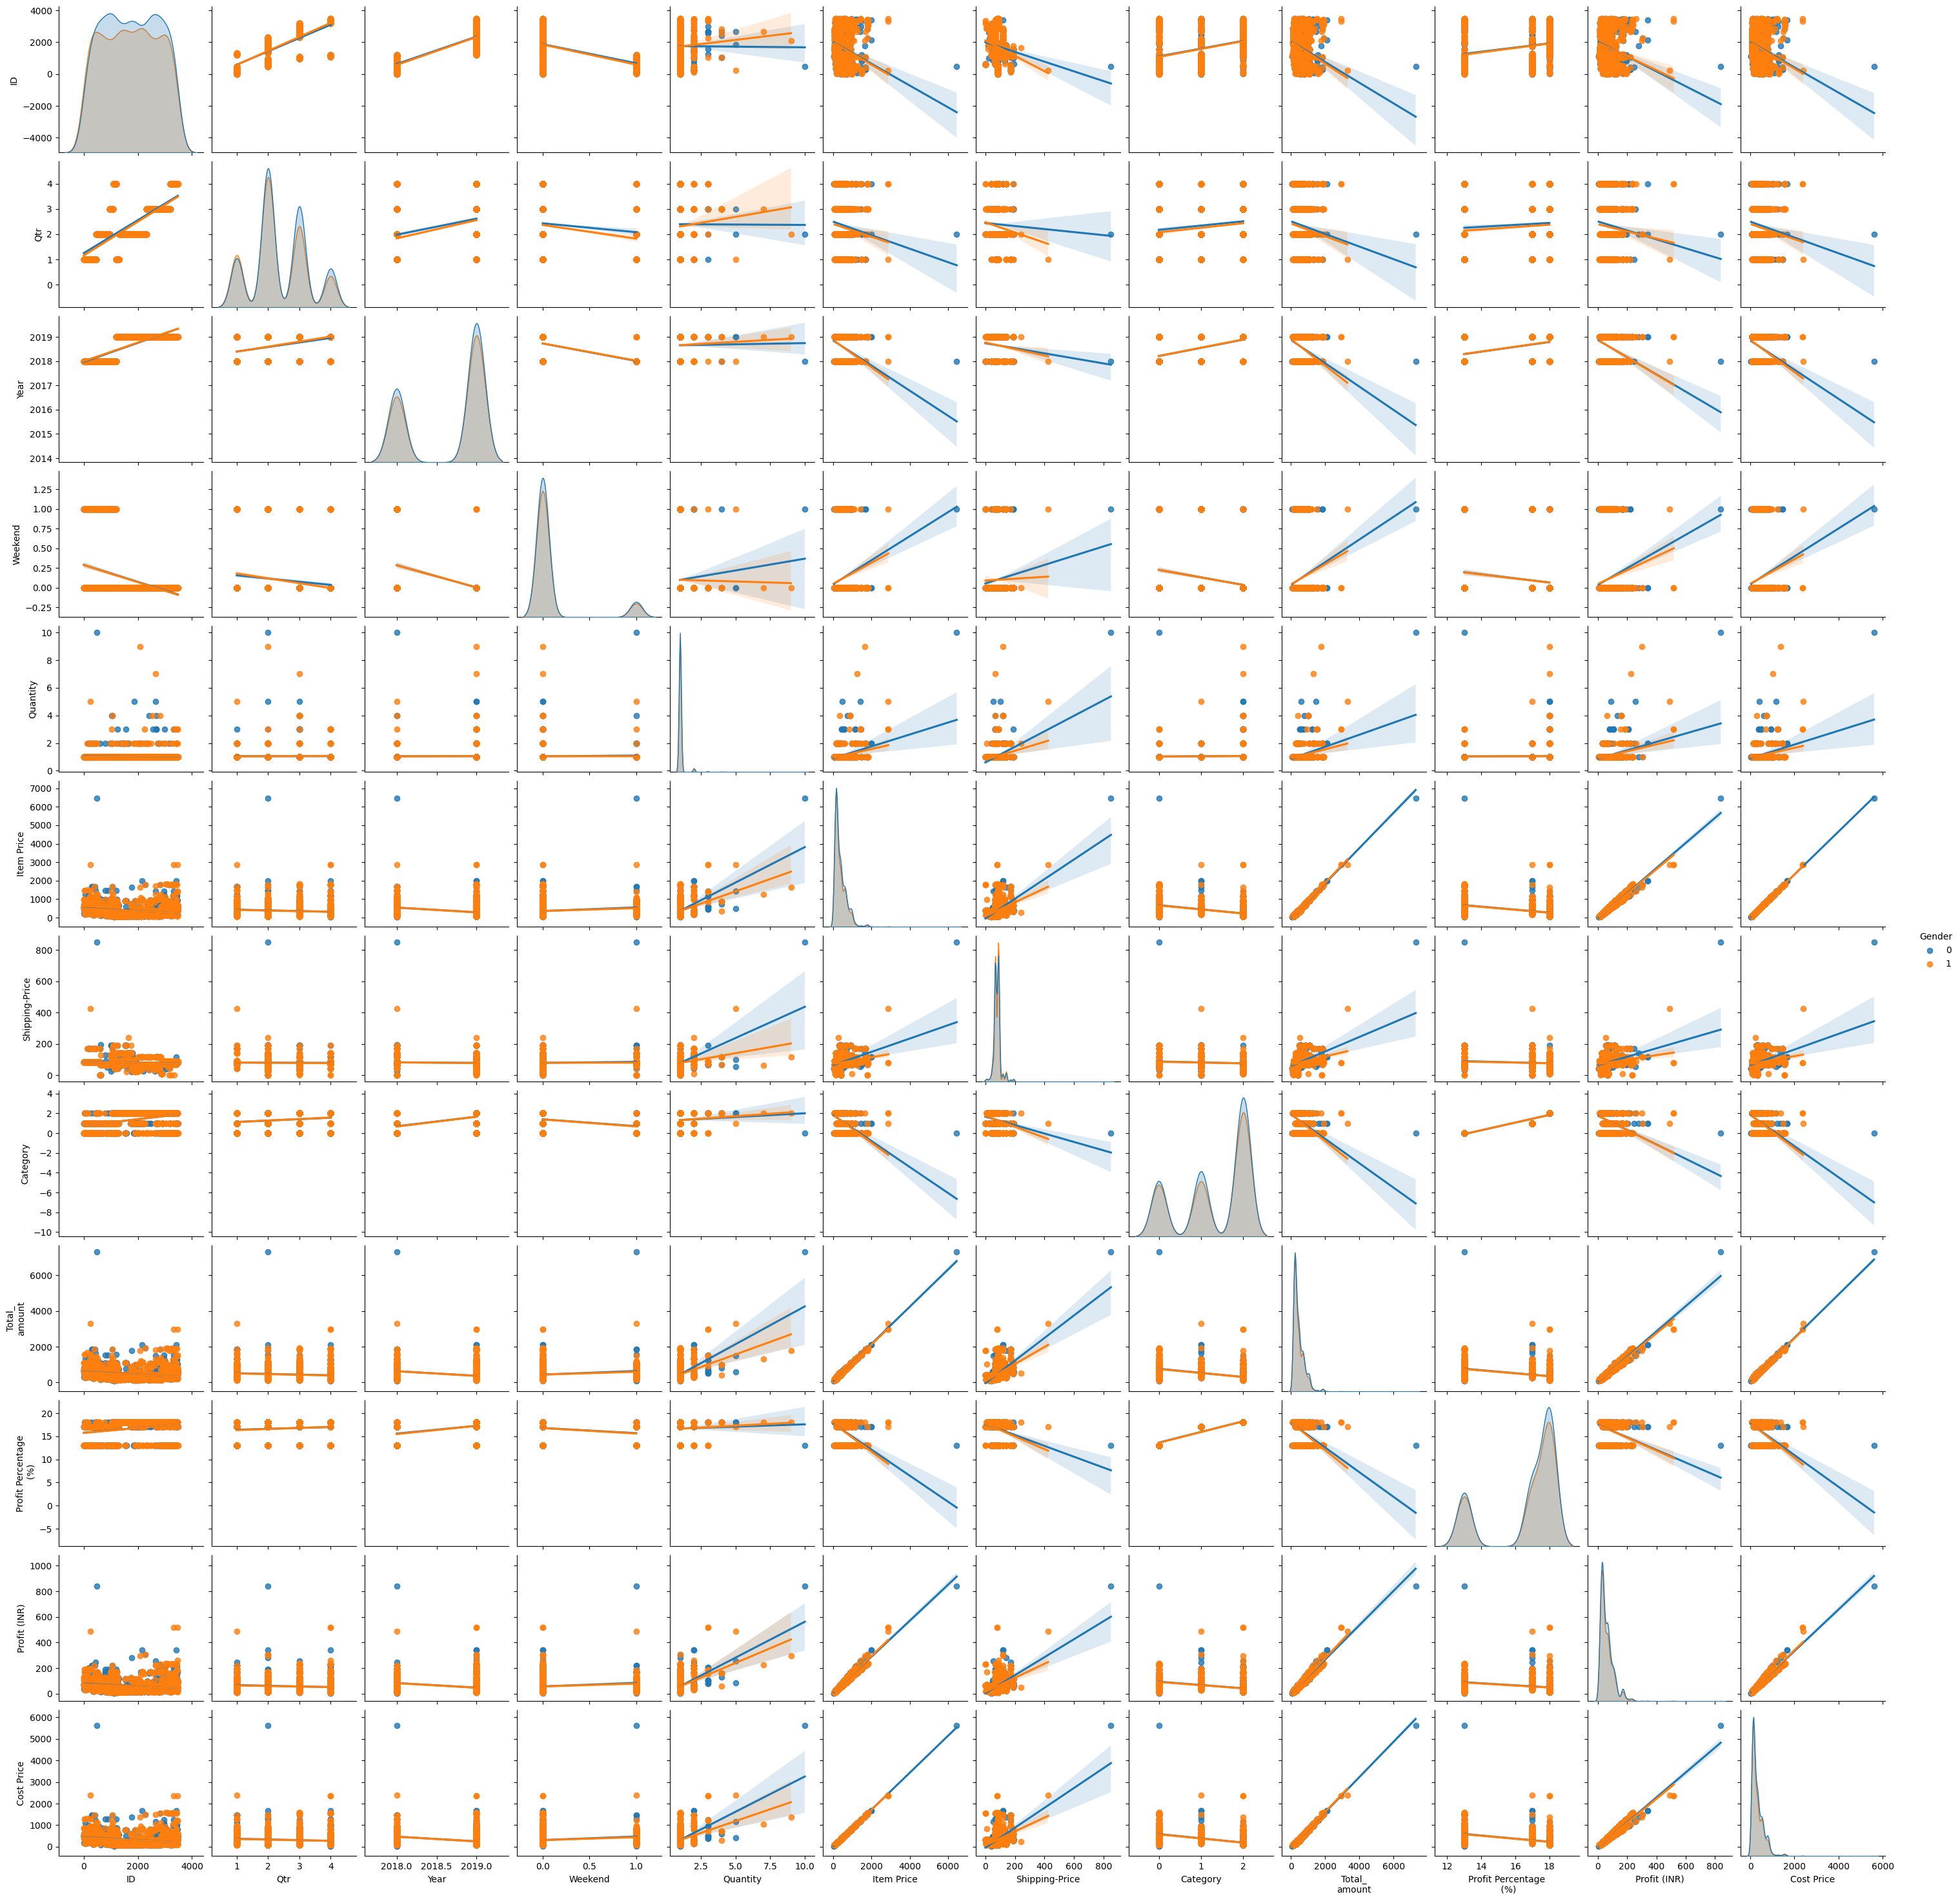

In [43]:
sns.pairplot(df_new, kind="reg", hue = "Gender")

In [44]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3480 non-null   int64  
 1   Qtr                     3480 non-null   int64  
 2   Year                    3480 non-null   int64  
 3   Weekend                 3480 non-null   int64  
 4   Gender                  3480 non-null   int64  
 5   Quantity                3480 non-null   int64  
 6   Item Price              3480 non-null   float64
 7   Shipping-Price          3480 non-null   float64
 8   Category                3480 non-null   int64  
 9   Total_
amount           3480 non-null   float64
 10  Profit Percentage
 (%)  3480 non-null   int64  
 11  Profit (INR)            3480 non-null   float64
 12  Cost Price              3480 non-null   float64
dtypes: float64(5), int64(8)
memory usage: 353.6 KB


In [45]:
df_new["Category"] = df_new["Category"].map({0:'college', 1:'competition ', 2:'School'})
df_new["Category"].unique()

array(['college', 'competition ', 'School'], dtype=object)

In [46]:
df_new.head()

,ID,Qtr,Year,Weekend,Gender,Quantity,Item Price,Shipping-Price,Category,Total_\namount,Profit Percentage\n (%),Profit (INR),Cost Price
0,1,1,2018,0,1,1,999.0,85.0,college,1084.0,13,129.87,869.13
1,2,1,2018,0,0,1,640.0,85.0,competition,725.0,17,108.80,531.20
2,3,1,2018,0,0,1,715.0,85.0,competition,800.0,17,121.55,593.45
3,4,1,2018,0,1,1,565.0,85.0,college,650.0,13,73.45,491.55
4,5,1,2018,0,1,1,494.0,85.0,college,579.0,13,64.22,429.78


In [47]:
df_dummies=pd.get_dummies(df_new, columns=['Category'], drop_first=True)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [49]:
X = df_dummies.drop('Cost Price', axis=1)
y = df_dummies['Cost Price']

In [50]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.25, random_state=40)

In [51]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

In [52]:
xgb = XGBRegressor()
model = xgb.fit(X_train, y_train)
model.score(X_test, y_test)

0.9982947368473027

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
xgb = XGBRegressor()
model_scaled = xgb.fit(X_train_scaled, y_train)
model_scaled.score(X_test_scaled, y_test)

0.9982947368473027

In [55]:
import tensorflow as tf

In [56]:
model = tf.keras.Sequential()
input_layer = tf.keras.layers.Dense(100, input_shape=(X_train_scaled.shape[1],), activation="relu")
model.add(input_layer)

model.add(tf.keras.layers.Dense(50, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1, activation="linear"))

model.summary()
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mape'])
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=10,
    restore_best_weights=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1400      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 6501 (25.39 KB)
Trainable params: 6501 (25.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
history = model.fit(X_train_scaled, y_train,
                    callbacks=[early_stopping],
                    epochs=500, verbose=1, batch_size=2000, validation_split=0.2)

Epoch 1/500
2/2 [==============================] - 1s 250ms/step - loss: 314.0476 - mape: 99.9149 - val_loss: 317.7058 - val_mape: 99.8466
Epoch 2/500
2/2 [==============================] - 0s 34ms/step - loss: 313.9251 - mape: 99.8436 - val_loss: 317.5851 - val_mape: 99.7783
Epoch 3/500
2/2 [==============================] - 0s 34ms/step - loss: 313.8065 - mape: 99.7764 - val_loss: 317.4639 - val_mape: 99.7102
Epoch 4/500
2/2 [==============================] - 0s 35ms/step - loss: 313.6824 - mape: 99.7037 - val_loss: 317.3376 - val_mape: 99.6391
Epoch 5/500
2/2 [==============================] - 0s 36ms/step - loss: 313.5653 - mape: 99.6365 - val_loss: 317.2062 - val_mape: 99.5654
Epoch 6/500
2/2 [==============================] - 0s 34ms/step - loss: 313.4293 - mape: 99.5601 - val_loss: 317.0680 - val_mape: 99.4877
Epoch 7/500
2/2 [==============================] - 0s 35ms/step - loss: 313.2934 - mape: 99.4814 - val_loss: 316.9222 - val_mape: 99.4059
Epoch 8/500
2/2 [================

In [58]:
model_y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, model_y_pred)
print('R2 score:', r2)

28/28 [==============================] - 0s 1ms/step
R2 score: 0.8780712005145871


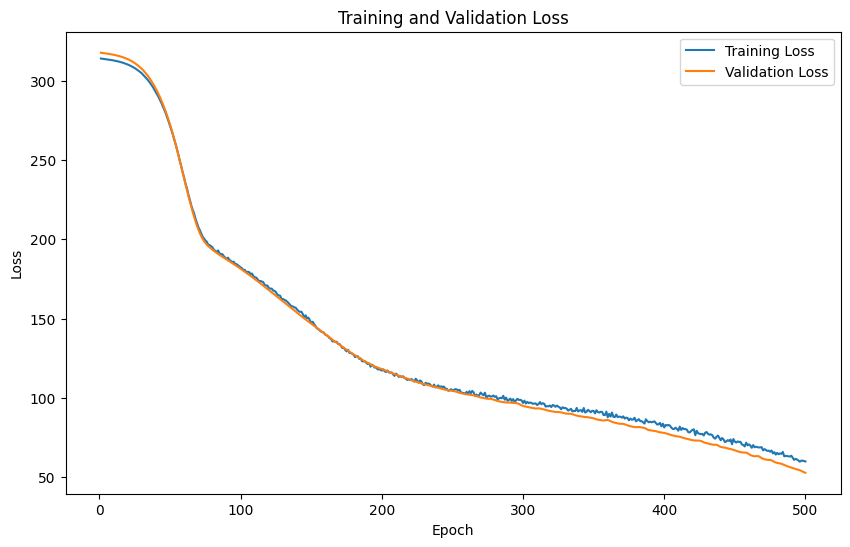

In [59]:
plt.figure(figsize=(10, 6))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")

plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [60]:
ann = tf.keras.Sequential([tf.keras.layers.Dense(64, activation="relu"),
                           tf.keras.layers.Dense(16, activation="relu"),
                 tf.keras.layers.Dense(1, activation='linear')])

ann.compile(optimizer='adam',
            loss='mean_absolute_error',
            metrics=['mape'])


In [61]:
history = ann.fit(X_train_scaled, y_train, epochs=200, validation_split=0.2)

Epoch 1/200
66/66 [==============================] - 1s 5ms/step - loss: 313.6022 - mape: 99.6838 - val_loss: 315.8273 - val_mape: 98.8054
Epoch 2/200
66/66 [==============================] - 0s 3ms/step - loss: 306.7981 - mape: 95.8558 - val_loss: 300.6038 - val_mape: 90.3669
Epoch 3/200
66/66 [==============================] - 0s 3ms/step - loss: 272.9471 - mape: 76.9455 - val_loss: 240.1777 - val_mape: 57.8276
Epoch 4/200
66/66 [==============================] - 0s 3ms/step - loss: 208.1523 - mape: 51.1795 - val_loss: 192.9343 - val_mape: 50.7496
Epoch 5/200
66/66 [==============================] - 0s 3ms/step - loss: 185.2572 - mape: 54.3778 - val_loss: 179.4691 - val_mape: 52.5208
Epoch 6/200
66/66 [==============================] - 0s 3ms/step - loss: 171.6794 - mape: 55.0710 - val_loss: 164.5341 - val_mape: 50.8359
Epoch 7/200
66/66 [==============================] - 0s 3ms/step - loss: 156.9102 - mape: 52.3831 - val_loss: 150.1574 - val_mape: 46.0233
Epoch 8/200
66/66 [========

In [62]:
ann_y_pred = ann.predict(X_test_scaled)
r2 = r2_score(y_test, ann_y_pred)
print('R2 score:', r2)

28/28 [==============================] - 0s 1ms/step
R2 score: 0.9990841809084793


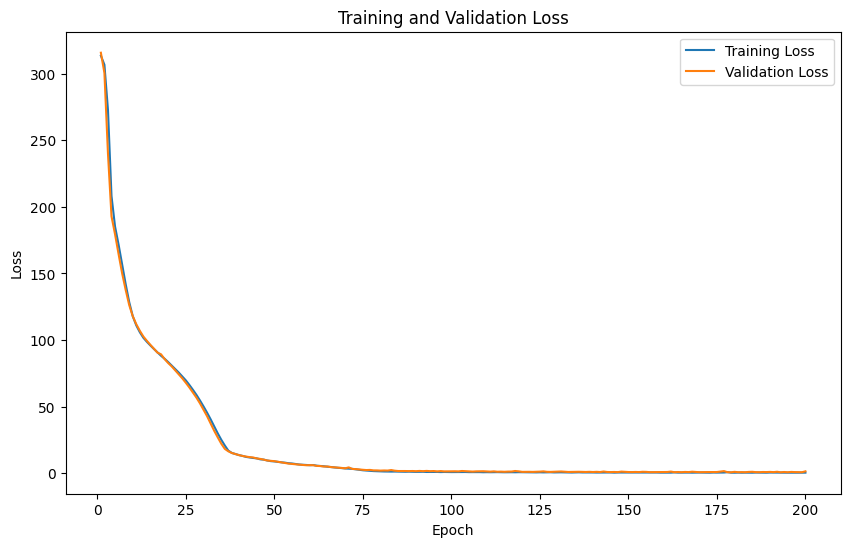

In [63]:
plt.figure(figsize=(10, 6))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")

plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()